In [1]:
# load data

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

predictors = mnist['data']

labels = mnist['target']
labels = labels.astype(np.uint16)

In [4]:
np.iinfo(np.uint16)

iinfo(min=0, max=65535, dtype=uint16)

In [5]:
# plot digit image

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def show_digit(series_of_pixel_intensities, convert_to_numpy=True):
    if convert_to_numpy:
        array_of_pixel_intensities = series_of_pixel_intensities.to_numpy()
    else:
        array_of_pixel_intensities = series_of_pixel_intensities
    array_of_pixel_intensities = array_of_pixel_intensities.reshape(28, 28)
    plt.imshow(array_of_pixel_intensities, cmap='binary')
    plt.axis('off')
    plt.show()

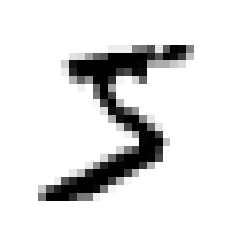

In [61]:
show_digit(predictors.iloc[0,])

In [8]:
# create train and test sets
# NOTE: data is preshuffled

In [9]:
train_predictors = predictors[:60000]
train_labels = labels[:60000]

test_predictors = predictors[60000:]
test_labels = labels[60000:]

In [10]:
train_predictors.shape

(60000, 784)

In [11]:
test_predictors.shape

(10000, 784)

In [12]:
# 1. K neighbors classifier with over 97% accuracy

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameter_grid = [ { 'weights' : ['uniform', 'distance'] , 'n_neighbors' : [1, 2, 3, 4, 5] } ]

grid_search = GridSearchCV(KNeighborsClassifier(), parameter_grid, cv=3, scoring='accuracy')
grid_search.fit(train_predictors, train_labels)

KeyboardInterrupt: 

In [ ]:
params = grid_search.cv_results_['params']
accs = grid_search.cv_results_['mean_test_score']

param_acc_list = list(zip(params, accs))
param_acc_list.sort(reverse=True, key=lambda param_acc : param_acc[1])

for param, acc in param_acc_list:
    print(f'{param} ============ {acc}')

In [ ]:
# optimize F1 score instead

In [113]:
grid_search = GridSearchCV(KNeighborsClassifier(), parameter_grid, cv=3, scoring='f1_macro')
grid_search.fit(train_predictors, train_labels)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='f1_macro')

In [114]:
params = grid_search.cv_results_['params']
fs = grid_search.cv_results_['mean_test_score']

param_f_list = list(zip(params, fs))
param_f_list.sort(reverse=True, key=lambda param_f : param_f[1])

for param, f in param_f_list:
    print(f'{param} ============ {f}')

{'n_neighbors': 4, 'weights': 'distance'} ============ 0.970156608043116
{'n_neighbors': 3, 'weights': 'distance'} ============ 0.9691256047883406
{'n_neighbors': 5, 'weights': 'distance'} ============ 0.9684319206591537
{'n_neighbors': 3, 'weights': 'uniform'} ============ 0.9679630773056811
{'n_neighbors': 1, 'weights': 'uniform'} ============ 0.9672319100785288
{'n_neighbors': 1, 'weights': 'distance'} ============ 0.9672319100785288
{'n_neighbors': 2, 'weights': 'distance'} ============ 0.9672319100785288
{'n_neighbors': 5, 'weights': 'uniform'} ============ 0.9672163752925185
{'n_neighbors': 4, 'weights': 'uniform'} ============ 0.966384215833583
{'n_neighbors': 2, 'weights': 'uniform'} ============ 0.9600733106373248


In [132]:
test_predictions = grid_search.best_estimator_.predict(test_predictors)

In [ ]:
# 2. shift digits for training set expansion

In [ ]:
# create and test shift_image function

In [86]:
from scipy.ndimage.interpolation import shift

def shift_image(series_of_pixel_intensities, list_of_shifts):
    array_of_pixel_intensities = series_of_pixel_intensities.to_numpy()
    array_of_pixel_intensities = array_of_pixel_intensities.reshape(28, 28)
    array_of_pixel_intensities = shift(array_of_pixel_intensities, list_of_shifts, mode='constant', cval=0.0)
    array_of_pixel_intensities = array_of_pixel_intensities.reshape(784)
    array_of_pixel_intensities = array_of_pixel_intensities.round(decimals=1)
    array_of_pixel_intensities = np.absolute(array_of_pixel_intensities)
    return array_of_pixel_intensities


In [87]:
import pandas as pd

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train_predictors.iloc[0,])

pixel1        0.0
pixel2        0.0
pixel3        0.0
pixel4        0.0
pixel5        0.0
pixel6        0.0
pixel7        0.0
pixel8        0.0
pixel9        0.0
pixel10       0.0
pixel11       0.0
pixel12       0.0
pixel13       0.0
pixel14       0.0
pixel15       0.0
pixel16       0.0
pixel17       0.0
pixel18       0.0
pixel19       0.0
pixel20       0.0
pixel21       0.0
pixel22       0.0
pixel23       0.0
pixel24       0.0
pixel25       0.0
pixel26       0.0
pixel27       0.0
pixel28       0.0
pixel29       0.0
pixel30       0.0
pixel31       0.0
pixel32       0.0
pixel33       0.0
pixel34       0.0
pixel35       0.0
pixel36       0.0
pixel37       0.0
pixel38       0.0
pixel39       0.0
pixel40       0.0
pixel41       0.0
pixel42       0.0
pixel43       0.0
pixel44       0.0
pixel45       0.0
pixel46       0.0
pixel47       0.0
pixel48       0.0
pixel49       0.0
pixel50       0.0
pixel51       0.0
pixel52       0.0
pixel53       0.0
pixel54       0.0
pixel55       0.0
pixel56   

In [88]:
test_series = train_predictors.iloc[0,]

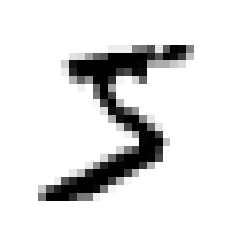

In [89]:
show_digit(test_series)

In [90]:
shifted_array = shift_image(test_series, [0, 10])
shifted_array

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

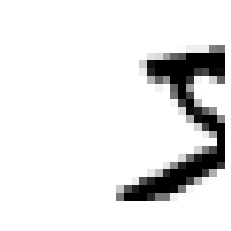

In [91]:
show_digit(shift_image(test_series, [0, 10]), convert_to_numpy=False)

In [ ]:
# expand training set

In [147]:
train_predictors_r = train_predictors.apply(lambda x : shift_image(x, [0, 1]), axis=1, result_type='expand')
train_predictors_l = train_predictors.apply(lambda x : shift_image(x, [0, -1]), axis=1, result_type='expand')
train_predictors_d = train_predictors.apply(lambda x : shift_image(x, [1, 0]), axis=1, result_type='expand')
train_predictors_u = train_predictors.apply(lambda x : shift_image(x, [-1, 0]), axis=1, result_type='expand')

train_predictors_rr = train_predictors.apply(lambda x : shift_image(x, [0, 2]), axis=1, result_type='expand')
train_predictors_ll = train_predictors.apply(lambda x : shift_image(x, [0, -2]), axis=1, result_type='expand')
train_predictors_dd = train_predictors.apply(lambda x : shift_image(x, [2, 0]), axis=1, result_type='expand')
train_predictors_uu = train_predictors.apply(lambda x : shift_image(x, [-2, 0]), axis=1, result_type='expand')

train_predictors_ru = train_predictors.apply(lambda x : shift_image(x, [-1, 1]), axis=1, result_type='expand')
train_predictors_rd = train_predictors.apply(lambda x : shift_image(x, [1, 1]), axis=1, result_type='expand')
train_predictors_lu = train_predictors.apply(lambda x : shift_image(x, [-1, -1]), axis=1, result_type='expand')
train_predictors_ld = train_predictors.apply(lambda x : shift_image(x, [1, -1]), axis=1, result_type='expand')

training_set_expansion_list = [train_predictors_r, train_predictors_l, train_predictors_d, train_predictors_u,
                              train_predictors_rr, train_predictors_ll, train_predictors_dd, train_predictors_uu,
                              train_predictors_ru, train_predictors_rd, train_predictors_lu, train_predictors_ld]

In [148]:
pixel_column_names = {x : f'pixel{x + 1}' for x in range(784)}

In [149]:
for df in training_set_expansion_list:
    df.rename(pixel_column_names, axis=1, inplace=True)

In [150]:
expanded_train_predictors = train_predictors.append(training_set_expansion_list)
expanded_train_predictors

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
expanded_train_labels = train_labels

for x in range(len(training_set_expansion_list)):
    expanded_train_labels = expanded_train_labels.append(train_labels, ignore_index=True)

In [159]:
expanded_train_labels

0         5
1         0
2         4
3         1
4         9
         ..
779995    8
779996    3
779997    5
779998    6
779999    8
Name: class, Length: 780000, dtype: uint16

In [ ]:
# retrain clone of best estimator from F1 grid search on expanded training set

In [152]:
from sklearn.base import clone

best_estimator = clone(grid_search.best_estimator_)
best_estimator.fit(expanded_train_predictors, expanded_train_labels)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [153]:
expanded_test_predictions = best_estimator.predict(test_predictors)

In [154]:
# compare outcomes on test set (probably should have used cross_val_score on training/expanded training set instead)
# to avoid overfitting the test set, but this is just for fun anyway

In [155]:
from sklearn.metrics import accuracy_score, f1_score

test_accuracy = accuracy_score(test_labels, test_predictions)
expanded_test_accuracy = accuracy_score(test_labels, expanded_test_predictions)

In [156]:
test_f1 = f1_score(test_labels, test_predictions, average='macro')
expanded_test_f1 = f1_score(test_labels, expanded_test_predictions, average='macro')

In [157]:
f'test accuracy : {test_accuracy}         augmented test accuracy : {expanded_test_accuracy}'

'test accuracy : 0.9714         augmented test accuracy : 0.9762'

In [158]:
f'test f1 : {test_f1}         augmented test f1 : {expanded_test_f1}'

'test f1 : 0.971224084176584         augmented test f1 : 0.9762112690019844'

In [ ]:
# 3. tackle the Titanic dataset ###################################################################

In [2]:
import pandas as pd

titanic = pd.read_csv('titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
import re

def get_text_between(text_to_search, start='.*, ', end=r'\..*'):
    result = re.search(start + '(.*)' + end, text_to_search)
    return result.group(1)

In [4]:
titanic['Prefix'] = titanic['Name'].apply(lambda x : get_text_between(x))

In [5]:
# create train and test sets

In [6]:
predictors = titanic.drop(columns=['Survived'])
labels = titanic['Survived']
titanic['Cabin'] = titanic['Cabin'].values.astype('str')
titanic['Embarked'] = titanic['Embarked'].values.astype('str')

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

train_test_split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)

for train_indices, test_indices in train_test_split.split(predictors, labels):
    train_predictors = predictors.loc[train_indices]
    train_labels = labels.loc[train_indices]
    
    test_predictors = predictors.loc[test_indices]
    test_labels = labels.loc[test_indices]

In [8]:
train_predictors

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
692,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,Mr
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,Mr
527,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,Mr
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,Mrs
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q,Miss
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,Mrs
462,463,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S,Mr


In [9]:
# create a predictors preparation pipeline

# takes a dataset
# drops columns
# imputes and standardizes numeric values
# encodes categorical values based on list of all categorical values from full dataset

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
class PreparationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_cabin=True, drop_prefix=False):
        # column names
        self.drop_cabin = drop_cabin
        self.drop_prefix = drop_prefix
        
        self.numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
        self.ordinal_columns = ['Pclass']
        self.categorical_columns = ['Sex', 'Cabin', 'Embarked', 'Prefix']
        
        if self.drop_cabin:
            self.categorical_columns.remove('Cabin')
            
        if self.drop_prefix:
            self.categorical_columns.remove('Prefix')
        
        # levels and categories
        self.pclass_levels = sorted(list(titanic['Pclass'].unique()))
        self.sex_categories = sorted(list(titanic['Sex'].unique()))
        self.cabin_categories = sorted(titanic['Cabin'].unique())
        self.embarked_categories = sorted(titanic['Embarked'].unique())
        self.prefix_categories = sorted(titanic['Prefix'].unique())
        
        self.categories = [self.sex_categories, self.cabin_categories, self.embarked_categories, self.prefix_categories]
        
        if self.drop_cabin:
            self.categories.remove(self.cabin_categories)
            
        if self.drop_prefix:
            self.categories.remove(self.prefix_categories)
        
        # pipelines
        self.numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                           ('scaler', StandardScaler())])
        self.ordinal_pipeline = OrdinalEncoder(categories=[self.pclass_levels])
        self.categorical_pipeline = OneHotEncoder(categories=self.categories, handle_unknown='ignore')
        
        self.preparation_pipeline = ColumnTransformer([('numerical', self.numerical_pipeline, self.numerical_columns),
                                               ('ordinal', self.ordinal_pipeline, self.ordinal_columns),
                                               ('categorical', self.categorical_pipeline, self.categorical_columns)])
        
        return
    
    def fit(self, X, y=None):
        self.preparation_pipeline.fit(X)
        return self
    
    def transform(self, X, y=None):
        return self.preparation_pipeline.transform(X)

In [12]:
data_prep = PreparationTransformer()
prepared_train_predictors = data_prep.fit_transform(train_predictors)
prepared_train_predictors

<712x29 sparse matrix of type '<class 'numpy.float64'>'
	with 5523 stored elements in Compressed Sparse Row format>

In [13]:
# explore models

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
cross_val_score(KNeighborsClassifier(), prepared_train_predictors, train_labels, cv=5, scoring='f1').mean()

0.7433493577336193

In [16]:
cross_val_score(SGDClassifier(), prepared_train_predictors, train_labels, cv=5, scoring='f1').mean()

0.7195537854593257

In [17]:
cross_val_score(RandomForestClassifier(), prepared_train_predictors, train_labels, cv=5, scoring='f1').mean()

0.7286544788484483

In [18]:
cross_val_score(GaussianNB(), prepared_train_predictors.toarray(), train_labels, cv=5, scoring='f1').mean()

0.3446528141583577

In [19]:
# create a full preparation-prediction pipeline

In [27]:
class PreparationPredictor(BaseEstimator):
    def __init__(self, drop_cabin=True, drop_prefix=False, predictor_name='k', n_neighbors=5, weights='uniform', loss='hinge', alpha=.0001, n_estimators=100, max_features=None):
        self.drop_cabin = drop_cabin
        self.drop_prefix = drop_prefix
        
        self.n_neighbors = n_neighbors
        self.weights = weights
        
        self.loss = loss
        self.alpha = alpha
        
        self.n_estimators = n_estimators
        self.max_features = max_features
        
        self.predictor_name = predictor_name
        
        return
    
    def fit(self, X, y):
        self.preparation_transformer = PreparationTransformer(drop_cabin=self.drop_cabin, drop_prefix=self.drop_prefix)
        
        if self.predictor_name == 'k':
            self.predictor = KNeighborsClassifier(n_neighbors=self.n_neighbors, weights=self.weights)
        elif self.predictor_name == 'sgd':
            self.predictor = SGDClassifier(loss=self.loss, alpha=self.alpha)
        elif self.predictor_name == 'for':
            self.predictor = RandomForestClassifier(n_estimators=self.n_estimators, max_features=self.max_features)
        
        self.preparation_prediction_pipeline = Pipeline([('preparation', self.preparation_transformer),
                                                        ('prediction', self.predictor)])
        self.preparation_prediction_pipeline.fit(X, y)
        return self
    
    def predict(self, X):
        return self.preparation_prediction_pipeline.predict(X)

In [28]:
# optimize with grid search

In [29]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# accuracy for fun

In [30]:
grid_search = GridSearchCV(PreparationPredictor(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(train_predictors, train_labels)

KeyboardInterrupt: 

In [ ]:
params = grid_search.cv_results_['params']
accs = grid_search.cv_results_['mean_test_score']

param_acc_list = list(zip(params, accs))
param_acc_list.sort(reverse=True, key=lambda param_acc : param_acc[1])

for param, acc in param_acc_list:
    print(param, 'Accuracy : ' + str(acc), sep='\n', end='\n\n')

In [ ]:
# f1 score for serious

In [31]:
param_grid = [{'drop_cabin' : [True, False], 'drop_prefix' : [True, False], 'predictor_name' : ['k'], 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'weights' : ['uniform', 'distance']},
             {'drop_cabin' : [True, False], 'drop_prefix' : [True, False], 'predictor_name' : ['sgd'], 'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 'alpha' : [.0001 * (x + 1) for x in range(10)]},
             {'drop_cabin' : [True, False], 'drop_prefix' : [True, False], 'predictor_name' : ['for'], 'n_estimators' : [25 * (x + 1) for x in range(10)], 'max_features' : ['sqrt', 'log2', None]}]

grid_search = GridSearchCV(PreparationPredictor(), param_grid, scoring='f1', cv=5)
grid_search.fit(train_predictors, train_labels)

GridSearchCV(cv=5, estimator=PreparationPredictor(),
             param_grid=[{'drop_cabin': [True, False],
                          'drop_prefix': [True, False],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
                          'predictor_name': ['k'],
                          'weights': ['uniform', 'distance']},
                         {'alpha': [0.0001, 0.0002, 0.00030000000000000003,
                                    0.0004, 0.0005, 0.0006000000000000001,
                                    0.0007, 0.0008, 0.0009000000000000001,
                                    0.001],
                          'drop_cabin': [True, False],
                          'drop_prefix': [True, False],
                          'loss': ['hinge', 'log', 'modified_huber',
                                   'squared_hinge', 'perceptron'],
                          'predictor_name': ['sgd']},
                         {'drop_cabin': [True, False],
                          'drop_

In [32]:
params = grid_search.cv_results_['params']
fs = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

param_f_list = list(zip(params, fs, stds))
param_f_list.sort(reverse=True, key=lambda param_f : param_f[1])

for param, f, std in param_f_list:
    print(param, 'F1 : ' + str(f), 'std : ' + str(std), sep='\n', end='\n\n')

{'alpha': 0.0004, 'drop_cabin': False, 'drop_prefix': False, 'loss': 'log', 'predictor_name': 'sgd'}
F1 : 0.7574397614675611
std : 0.03180123361212011

{'alpha': 0.0009000000000000001, 'drop_cabin': True, 'drop_prefix': False, 'loss': 'log', 'predictor_name': 'sgd'}
F1 : 0.7561535714725475
std : 0.036381355376117294

{'drop_cabin': True, 'drop_prefix': False, 'n_neighbors': 7, 'predictor_name': 'k', 'weights': 'uniform'}
F1 : 0.7557356849309039
std : 0.03406784218786077

{'alpha': 0.0006000000000000001, 'drop_cabin': True, 'drop_prefix': False, 'loss': 'log', 'predictor_name': 'sgd'}
F1 : 0.7553743508393184
std : 0.02936392716226664

{'drop_cabin': False, 'drop_prefix': False, 'n_neighbors': 7, 'predictor_name': 'k', 'weights': 'uniform'}
F1 : 0.7537319136653211
std : 0.028605767056553273

{'alpha': 0.001, 'drop_cabin': False, 'drop_prefix': False, 'loss': 'log', 'predictor_name': 'sgd'}
F1 : 0.7523658054748226
std : 0.027565864888844056

{'alpha': 0.0009000000000000001, 'drop_cabin': 

In [47]:
best_estimator = grid_search.best_estimator_

cross_val_score(best_estimator, train_predictors, train_labels, cv=5, scoring='accuracy').mean()

0.8048163104501134

In [46]:
cross_val_score(best_estimator, train_predictors, train_labels, cv=5, scoring='f1').mean()

0.7566912189977206

In [37]:
# evaluate on test set

In [49]:
from sklearn.metrics import accuracy_score, f1_score

In [51]:
test_predictions = best_estimator.predict(test_predictors)
accuracy_score(test_labels, test_predictions)

0.8435754189944135

In [52]:
f1_score(test_labels, test_predictions)

0.7941176470588236

In [ ]:
# 4. Spam/ham classifier ################################################################

In [1]:
import pandas as pd
spam = pd.read_csv('SMSSpamCollection.tsv', delimiter='\t', names=['spam_flag', 'text'])

In [2]:
texts = spam['text']
labels = spam['spam_flag']

In [3]:
# create train and test sets

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

train_test_split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)

for train_indices, test_indices in train_test_split.split(texts, labels):
    train_texts = texts.loc[train_indices]
    train_flags = labels.loc[train_indices]
    
    test_texts = texts.loc[test_indices]
    test_flags = labels.loc[test_indices]

In [5]:
def convert_flag(flag):
    if flag == 'spam':
        return 1
    elif flag == 'ham':
        return 0
    return

In [6]:
train_labels = train_flags.apply(lambda flag : convert_flag(flag))
test_labels = test_flags.apply(lambda flag : convert_flag(flag))

In [7]:
# view train texts that are spam to find keywords

In [53]:
train_spam_indices = train_labels.loc[lambda x : x == 1].index

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
    print(train_texts[train_spam_indices])

1848    FREE NOKIA Or Motorola with upto 12mths 1/2price linerental, 500 FREE x-net mins&100txt/mth FREE B'tooth*. Call Mobileupd8 on 08001950382 or call 2optout/D3WV                                                                 
2053    Call 09094100151 to use ur mins! Calls cast 10p/min (mob vary). Service provided by AOM, just GBP5/month. AOM Box61,M60 1ER until u stop. Ages 18+ only!                                                                       
4156    Want a new Video Phone? 750 anytime any network mins? Half price line rental free text for 3 months? Reply or call 08000930705 for free delivery                                                                               
3913    You have an important customer service announcement. Call FREEPHONE 0800 542 0825 now!                                                                                                                                         
598     You have an important customer service announcement. Call FREEPH

In [33]:
#train_ham_indices = train_labels.loc[lambda x : x == 'ham'].index

In [34]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 100):
    print(train_texts[train_ham_indices])

184                                                                                He will, you guys close?
2171    CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER IF URGOIN OUTL8R,JUST REALLYNEED 2DOCD.PLEASE DONT...
5422                                                                Ok k..sry i knw 2 siva..tats y i askd..
4113                                                                              I'll see, but prolly yeah
4588                        I'll see if I can swing by in a bit, got some things to take care of here firsg
1581                                         I shall book chez jules for half eight, if that's ok with you?
3970    Thanks for your message. I really appreciate your sacrifice. I'm not sure of the process of dire...
2701    Feb  &lt;#&gt;  is "I LOVE U" day. Send dis to all ur "VALUED FRNDS" evn me. If 3 comes back u'l...
2755                                  Ok Chinese food on its way. When I get fat you're paying for my lipo.
1754                        

In [67]:
# use re to create a transformer that creates a vector of keyword flags

In [9]:
import re

def count_instances(reg_ex_to_search_for, text_to_search):
    return len(re.findall(reg_ex_to_search_for, text_to_search, re.IGNORECASE))

In [10]:
import numpy as np

In [98]:
list_of_reg_ex_searches = ['free', 'won', 'win', 'bonus', 'congrat', 'prize', 'claim', 'award',
                           'reward', 'club', 'quiz', 'sex', 'pic', 'offer', 'now', 'urgent',
                          'expires', 'valid', 'final', 'important', 'txt', 'sms', 'text', 'call',
                          'msg', 'stop', 'end', 'reply', 'send', 'code', ':', 'http', 'www',
                           r'co\.uk', '[0-9]{5,}', r'\.com', '£', 'per', r'[0-9\.]+ ?p', 'cost', 'price']

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, reg_ex_searches=list_of_reg_ex_searches):
        self.reg_ex_searches = reg_ex_searches
        return
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        search_arrays = [X.apply(lambda text : count_instances(search, text)) for search in list_of_reg_ex_searches]
        search_array = np.c_[search_arrays].T
        return search_array

In [100]:
tt = TextTransformer()
transformed_texts = tt.fit_transform(train_texts)

In [101]:
# explore models

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

cross_val_score(KNeighborsClassifier(), transformed_texts, train_labels, scoring='f1').mean()

0.870051457353167

In [103]:
from sklearn.ensemble import RandomForestClassifier

cross_val_score(RandomForestClassifier(), transformed_texts, train_labels, scoring='f1').mean()

0.9286819180229606

In [104]:
from sklearn.linear_model import SGDClassifier

cross_val_score(SGDClassifier(), transformed_texts, train_labels, scoring='f1').mean()

0.9368660174896517

In [105]:
from sklearn.naive_bayes import GaussianNB

cross_val_score(GaussianNB(), transformed_texts, train_labels, scoring='f1').mean()

0.8919898666873343

In [106]:
# optimize hyperparameters for f1 score (i.e. high recall and precision)

In [114]:
param_grid = [{'predictor_name' : ['k'], 'n_neighbors' : [x + 1 for x in range(10)], 'weights' : ['uniform', 'distance']},
             {'predictor_name' : ['sgd'], 'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 'alpha' : [.00001 * (10 ** x) for x in range(4)]},
             {'predictor_name' : ['for'], 'n_estimators' : [1 * (2 ** x) for x in range(10)], 'max_features' : ['sqrt', 'log2', None]}]

In [118]:
class TextTransformerAndPredictor(BaseEstimator):
    def __init__(self, predictor_name='k', n_neighbors=5, weights='uniform', loss='hinge', alpha=.0001, n_estimators=100, max_features=None):
        self.predictor_name = predictor_name
        
        self.n_neighbors = n_neighbors
        self.weights = weights
        
        self.loss = loss
        self.alpha = alpha
        
        self.n_estimators = n_estimators
        self.max_features = max_features
        
        return
    
    def fit(self, X, y):
        self.text_transformer = TextTransformer()
        if self.predictor_name == 'k':
            self.predictor = KNeighborsClassifier(n_neighbors=self.n_neighbors, weights=self.weights)
        elif self.predictor_name == 'sgd':
            self.predictor = SGDClassifier(loss=self.loss, alpha=self.alpha, max_iter=5000)
        elif self.predictor_name == 'for':
            self.predictor = RandomForestClassifier(n_estimators=self.n_estimators, max_features=self.max_features)
            
        self.predictor.fit(self.text_transformer.fit_transform(X), y)
        return self
    
    def predict(self, X, y=None):
        return self.predictor.predict(self.text_transformer.fit_transform(X))
        

In [119]:
from sklearn.model_selection import GridSearchCV

In [123]:
grid_search = GridSearchCV(TextTransformerAndPredictor(), param_grid, scoring='f1', cv=5)

In [124]:
grid_search.fit(train_texts, train_labels)

C:\Users\jepp\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\jepp\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\jepp\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\jepp\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before converge

GridSearchCV(cv=5, estimator=TextTransformerAndPredictor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'predictor_name': ['k'],
                          'weights': ['uniform', 'distance']},
                         {'alpha': [1e-05, 0.0001, 0.001, 0.01],
                          'loss': ['hinge', 'log', 'modified_huber',
                                   'squared_hinge', 'perceptron'],
                          'predictor_name': ['sgd']},
                         {'max_features': ['sqrt', 'log2', None],
                          'n_estimators': [1, 2, 4, 8, 16, 32, 64, 128, 256,
                                           512],
                          'predictor_name': ['for']}],
             scoring='f1')

In [125]:
params = grid_search.cv_results_['params']
fs = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

param_f_list = list(zip(params, fs, stds))
param_f_list.sort(reverse=True, key=lambda param_f : param_f[1])

for param, f, std in param_f_list:
    print(f'{param} ============ {f} =========== {std}')

{'alpha': 0.0001, 'loss': 'log', 'predictor_name': 'sgd'} ============ 0.9386419014131271 =========== 0.011322498102467568
{'alpha': 0.0001, 'loss': 'modified_huber', 'predictor_name': 'sgd'} ============ 0.9386107974908532 =========== 0.013448216455568639
{'alpha': 0.001, 'loss': 'modified_huber', 'predictor_name': 'sgd'} ============ 0.9361119329306453 =========== 0.005117916138735317
{'alpha': 0.0001, 'loss': 'hinge', 'predictor_name': 'sgd'} ============ 0.9360452854556905 =========== 0.011480905117659541
{'max_features': 'sqrt', 'n_estimators': 256, 'predictor_name': 'for'} ============ 0.9341296419670837 =========== 0.009720403766846308
{'max_features': 'log2', 'n_estimators': 256, 'predictor_name': 'for'} ============ 0.9340464645913299 =========== 0.009564399149203344
{'max_features': 'log2', 'n_estimators': 64, 'predictor_name': 'for'} ============ 0.933875475802286 =========== 0.005380847668565264
{'max_features': 'log2', 'n_estimators': 512, 'predictor_name': 'for'} ========

In [ ]:
# further fine tune

In [135]:
param_grid = {'predictor_name' : ['sgd'], 'loss' : ['hinge', 'log', 'modified_huber'], 'alpha' : [.00001 + .0001 * x for x in range(101)]}

In [136]:
grid_search = GridSearchCV(TextTransformerAndPredictor(), param_grid, scoring='f1', cv=5)

In [137]:
grid_search.fit(train_texts, train_labels)

GridSearchCV(cv=5, estimator=TextTransformerAndPredictor(),
             param_grid={'alpha': [1e-05, 0.00011, 0.00021,
                                   0.00031000000000000005,
                                   0.00041000000000000005, 0.00051,
                                   0.0006100000000000001, 0.00071,
                                   0.0008100000000000001, 0.0009100000000000001,
                                   0.00101, 0.00111, 0.0012100000000000001,
                                   0.0013100000000000002, 0.00141, 0.00151,
                                   0.00161, 0.0017100000000000001,
                                   0.0018100000000000002, 0.00191, 0.00201,
                                   0.0021100000000000003, 0.00221, 0.00231,
                                   0.0024100000000000002, 0.00251,
                                   0.0026100000000000003, 0.00271, 0.00281,
                                   0.0029100000000000003, ...],
                         'l

In [138]:
params = grid_search.cv_results_['params']
fs = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

param_f_list = list(zip(params, fs, stds))
param_f_list.sort(reverse=True, key=lambda param_f : param_f[1])

for param, f, std in param_f_list:
    print(f'{param} ============ {f} =========== {std}')

{'alpha': 0.00071, 'loss': 'modified_huber', 'predictor_name': 'sgd'} ============ 0.9397862799926953 =========== 0.008691477073115877
{'alpha': 0.00051, 'loss': 'modified_huber', 'predictor_name': 'sgd'} ============ 0.9390834796559824 =========== 0.006641774415891364
{'alpha': 0.00021, 'loss': 'modified_huber', 'predictor_name': 'sgd'} ============ 0.9385855293247587 =========== 0.010446695827111977
{'alpha': 0.00151, 'loss': 'modified_huber', 'predictor_name': 'sgd'} ============ 0.9385172986163639 =========== 0.004441428986019797
{'alpha': 0.0012100000000000001, 'loss': 'modified_huber', 'predictor_name': 'sgd'} ============ 0.9379263622870626 =========== 0.008132465984432196
{'alpha': 0.00021, 'loss': 'hinge', 'predictor_name': 'sgd'} ============ 0.9371737095687784 =========== 0.005130480331360667
{'alpha': 0.0013100000000000002, 'loss': 'modified_huber', 'predictor_name': 'sgd'} ============ 0.9370559469731046 =========== 0.009033497839237722
{'alpha': 0.0024100000000000002, 'lo

In [148]:
param_grid = {'predictor_name' : ['sgd'], 'loss' : ['modified_huber'], 'alpha' : [.00001 + .00001 * x for x in range(300)]}

In [149]:
grid_search = GridSearchCV(TextTransformerAndPredictor(), param_grid, scoring='f1', cv=5)

In [150]:
grid_search.fit(train_texts, train_labels)

GridSearchCV(cv=5, estimator=TextTransformerAndPredictor(),
             param_grid={'alpha': [1e-05, 2e-05, 3.0000000000000004e-05, 4e-05,
                                   5e-05, 6e-05, 7.000000000000001e-05, 8e-05,
                                   9e-05, 0.0001, 0.00011, 0.00012,
                                   0.00013000000000000002,
                                   0.00014000000000000001,
                                   0.00015000000000000001, 0.00016, 0.00017,
                                   0.00018, 0.00019, 0.0002, 0.00021, 0.00022,
                                   0.00023, 0.00024, 0.00025000000000000006,
                                   0.00026000000000000003,
                                   0.00027000000000000006,
                                   0.00028000000000000003,
                                   0.00029000000000000006,
                                   0.00030000000000000003, ...],
                         'loss': ['modified_huber'],
        

In [155]:
params = grid_search.cv_results_['params']
fs = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

param_f_list = list(zip(params, fs, stds))
param_f_list.sort(reverse=True, key=lambda param_f : param_f[1])

for param, f, std in param_f_list:
    print(str(param['alpha']) + ' ==== ' + str(f) + ' ===== ' + str(std))

0.00041000000000000005 ==== 0.9448570763050693 ===== 0.011741691042901686
0.00022 ==== 0.9446191911706497 ===== 0.010114897942695052
0.0005600000000000001 ==== 0.9439724086991781 ===== 0.0118078220143016
0.00047000000000000004 ==== 0.9438605597535303 ===== 0.007522818007570995
0.00027000000000000006 ==== 0.942889965706442 ===== 0.010090989763850314
0.0007800000000000001 ==== 0.9428325113144498 ===== 0.009709971693085887
0.00021 ==== 0.9427950603954383 ===== 0.015520238936628414
0.0008400000000000001 ==== 0.942254759767892 ===== 0.012465383975971531
0.0005200000000000001 ==== 0.9421166494137878 ===== 0.007134475974901274
0.0006000000000000001 ==== 0.9419580397363546 ===== 0.011720189455295148
0.0005800000000000001 ==== 0.9416967124388653 ===== 0.013069892338094446
0.00046000000000000007 ==== 0.9415121499702517 ===== 0.010300662257560508
0.00043000000000000004 ==== 0.9413989563980492 ===== 0.01307215371431088
0.00037000000000000005 ==== 0.9408414326584449 ===== 0.012500954079279225
0.000

In [157]:
param_f_list.sort(key=lambda param_f : param_f[2])

for param, f, std in param_f_list:
    print(str(param['alpha']) + ' ==== ' + str(f) + ' ===== ' + str(std))

0.0013800000000000002 ==== 0.9343526396495845 ===== 0.0016737993105912978
0.0011200000000000001 ==== 0.9343988226797585 ===== 0.001990346024823643
0.0004900000000000001 ==== 0.9374410052696527 ===== 0.0027028094632045568
0.00063 ==== 0.9380039451764244 ===== 0.0028110479448509355
0.00142 ==== 0.9376290082667698 ===== 0.0030114129183211854
0.0011300000000000001 ==== 0.9377734190161677 ===== 0.003042360166647881
0.0026200000000000004 ==== 0.934156358785175 ===== 0.0033414408880596803
0.00206 ==== 0.9333566815906481 ===== 0.003373214195839333
0.0008700000000000001 ==== 0.9372240353709784 ===== 0.00341008103687046
0.00169 ==== 0.9369227238555631 ===== 0.0034106745166192836
0.0006700000000000001 ==== 0.9360429707391477 ===== 0.003466964171713263
0.00076 ==== 0.9364406841322943 ===== 0.0035160086661988597
0.0018700000000000001 ==== 0.9366160424886655 ===== 0.0035766513804413517
0.0029100000000000003 ==== 0.933044487386128 ===== 0.003717757247866046
0.0007000000000000001 ==== 0.93209128727553

In [ ]:
# exporting alpha, f, and std to power bi to find favorable trade off between f1 score and variance

In [165]:
export = [(param_f_std[0]['alpha'], param_f_std[1], param_f_std[2]) for param_f_std in param_f_list]
export = pd.DataFrame(export, columns=['alpha', 'f1', 'std'])
export.to_csv('export.csv')

In [139]:
# evaluate on test set

In [ ]:
# go with alpha = .00138
# test alpha = .00041 for fun

In [167]:
from sklearn.metrics import accuracy_score, f1_score

In [168]:
low_std_model = TextTransformerAndPredictor(predictor_name='sgd', loss='modified_huber', alpha=.00138)
low_std_model.fit(train_texts, train_labels)
test_predictions = low_std_model.predict(test_texts)

In [169]:
accuracy_score(test_labels, test_predictions)

0.9829596412556054

In [170]:
f1_score(test_labels, test_predictions)

0.9333333333333333

In [174]:
high_f_model = TextTransformerAndPredictor(predictor_name='sgd', loss='modified_huber', alpha=.00041)
high_f_model.fit(train_texts, train_labels)
test_predictions = high_f_model.predict(test_texts)

In [175]:
accuracy_score(test_labels, test_predictions)

0.9811659192825112

In [176]:
f1_score(test_labels, test_predictions)

0.9263157894736842

In [ ]:
# note that the low std model actually seems preferable to the high f model, at least in this case